In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [125]:
class Regression:
    def __init__(self, weights_shape, learning_rate=0.1, C=0,reg_type="L2"):
        self.weights = np.random.randn(weights_shape + 1) #one extra column for the bias
        self.lr = learning_rate
        self.C = C
        self.reg_type= reg_type
        self.reg_list = ["l1", "l2"]
        self.loss_history = []

    def avg_loss(self, X, y):
        loss = 0
        N = len(X)
        for i in range(N):
            x = X[i].T
            loss += (y[i] - np.dot(self.weights, x)) **2
        
        #return the average loss 
        return loss / float(N)
    
    def update_weight(self, X, y):
        dl_dw = 0
        dl_db = 0
        dl_dw_reg = 0
        N = len(X)

        for i in range(N):
            x = X[i].T
            dl_dw += -2 * x[:-1] * (y[i] - np.dot(self.weights, x))
            dl_db += -2 * (y[i] - np.dot(self.weights, x))

            #the reqularization term

            if self.reg_type.lower() in self.reg_list:
                if self.reg_type.lower() == "l1":
                    dl_dw_reg = self.C * np.sum(np.abs(self.weights[:-1]))
                else:
                    dl_dw_reg = self.C * np.sum(self.weights[:-1]**2)

            else:
                print(f"Error: choose regularization type from {self.reg_list}")

        #update the weights, note that the last column of the weight matrix is the bias
        self.weights[:-1] -= (self.lr * dl_dw + dl_dw_reg) / float(N)
        self.weights[-1] -= (self.lr * dl_db) / float(N)
        
    def train(self, X, y, epochs):
        #make sure the input data is always 2D
        X = np.array(X,ndmin=2)
        #add a column of ones to each data point, this is what is multiplied by the bias 
        ones = np.ones(len(X)).reshape(-1,1)
        X = np.append(X, ones, axis=1)
        y = np.array(y)

        for epoch in range(epochs):
            self.update_weight(X, y)
            self.loss_history.append(self.avg_loss(X, y))
            print(f"epoch: {epoch} / {epochs} loss: {self.loss_history[epoch]}")

    def predict(self, X):
        X = np.array(X, ndmin=2)
        #add a column of ones to each data point, this is what is multiplied by the bias 
        ones = np.ones(len(X)).reshape(-1,1)
        X = np.append(X, ones, axis=1)

        predicted = []

        for i in range(len(X)):
            predicted.append(np.dot(self.weights, X[i]))
        
        return np.array(predicted)
    
    def MAE(self, target, predicted):
        mae = (np.array(target) - np.array(predicted))**2
        return np.sum(mae) / float(len(target))

       

In [158]:
X = np.random.randn(1000,2)
np.random.shuffle(X)
y = []
for x in X:
    y.append(x[0] +0.05*x[1] + 2) #2 is the bias
#y = np.array(y)

train_portion = int(0.7 * len(X))
X_train, X_test, y_train, y_test = X[:train_portion], X[train_portion:], y[:train_portion], y[train_portion:]

In [138]:
df = pd.read_csv("./DATA/Simple linear regression.csv")
X = df["SAT"].to_numpy().reshape(-1,1)
y = df["GPA"].to_numpy()

#nomalize X 
min = np.min(X)
max = np.max(X)

X_normalized = (X - min) / (max - min)
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))


In [206]:
r = Regression(1,0.1,0.1)
r.weights

array([-0.17726927, -0.52785879])

In [207]:
r.train(X_normalized,y_normalized, 100)
r.weights

epoch: 0 / 100 loss: 0.9695489495620366
epoch: 1 / 100 loss: 0.5448731003270822
epoch: 2 / 100 loss: 0.3103764637580936
epoch: 3 / 100 loss: 0.18089709283045285
epoch: 4 / 100 loss: 0.10940323471998296
epoch: 5 / 100 loss: 0.06992455849994947
epoch: 6 / 100 loss: 0.04812191643228401
epoch: 7 / 100 loss: 0.036078611385613635
epoch: 8 / 100 loss: 0.029423926230088927
epoch: 9 / 100 loss: 0.02574483773478805
epoch: 10 / 100 loss: 0.02370910520915455
epoch: 11 / 100 loss: 0.022581148952545305
epoch: 12 / 100 loss: 0.021954788976421846
epoch: 13 / 100 loss: 0.021605704843826866
epoch: 14 / 100 loss: 0.021409986599557108
epoch: 15 / 100 loss: 0.021299169939416638
epoch: 16 / 100 loss: 0.021235411677151025
epoch: 17 / 100 loss: 0.02119778336309343
epoch: 18 / 100 loss: 0.021174702719744646
epoch: 19 / 100 loss: 0.021159753673143666
epoch: 20 / 100 loss: 0.021149377334482185
epoch: 21 / 100 loss: 0.021141596116122586
epoch: 22 / 100 loss: 0.02113530843706226
epoch: 23 / 100 loss: 0.02112989863

array([0.41921964, 0.463434  ])

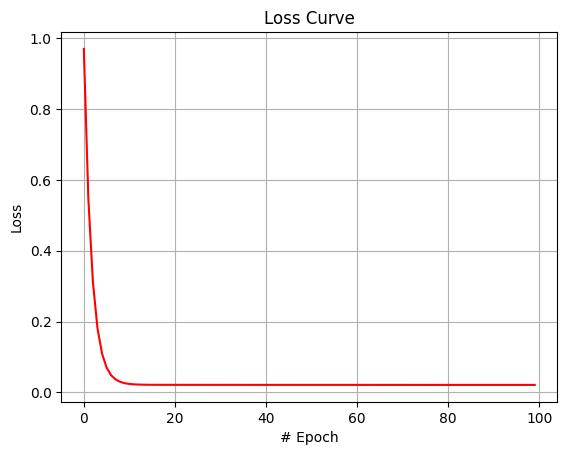

In [208]:
loss_h = r.loss_history
plt.plot(loss_h,color="red")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid()

In [209]:
#y_test_predicted = r.predict(X_test)
y_train_predicted = r.predict(X_normalized)
print(f"train MAE: {r.MAE(y_normalized, y_train_predicted)}")
#print(f"test MAE: {r.MAE(y_test, y_test_predicted)}")


train MAE: 0.02094649544603512


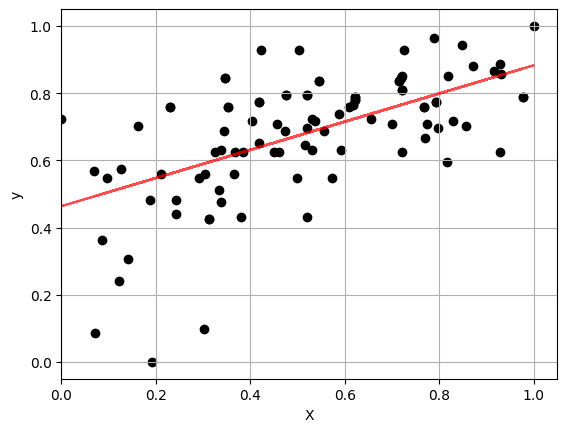

In [215]:
plt.scatter(X_normalized, y_normalized, c="black")
plt.plot(X_normalized, y_train_predicted, c="red", alpha=0.7)
plt.xlim([0,1.05])
plt.xlabel("X")
plt.ylabel("y")
plt.grid()


In [216]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
